# Implimentation Of KNN Algo On The Iris Dataset

In [45]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
# Load the Dataset
iris=pd.read_csv("IRIS.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [14]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [15]:
iris.shape

(150, 5)

In [ ]:
iris.isna()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [17]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [18]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [19]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# As we are trying to solve the classification  problem we should make sure that all the classes or all the types of data points are balanced 

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

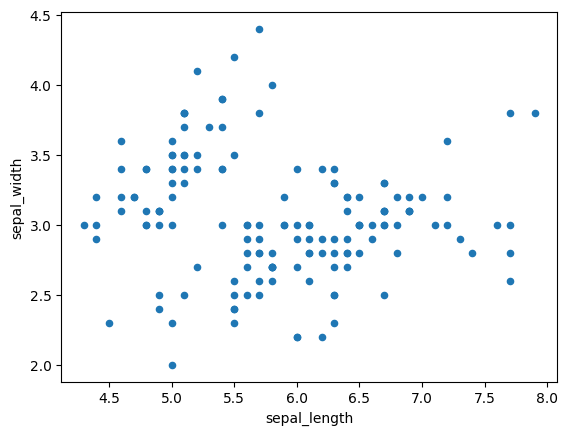

In [23]:
iris.plot(kind="scatter",x="sepal_length",y="sepal_width")

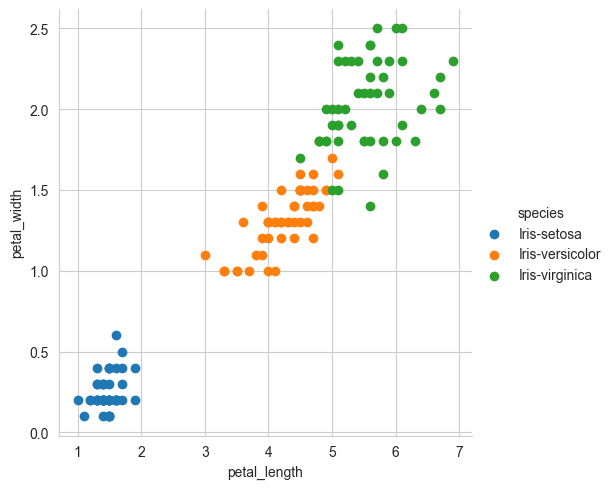

In [32]:
sns.set_style("whitegrid")
sns.FacetGrid(iris,hue="species",height=5).map(plt.scatter,"petal_length","petal_width").add_legend()
plt.show()

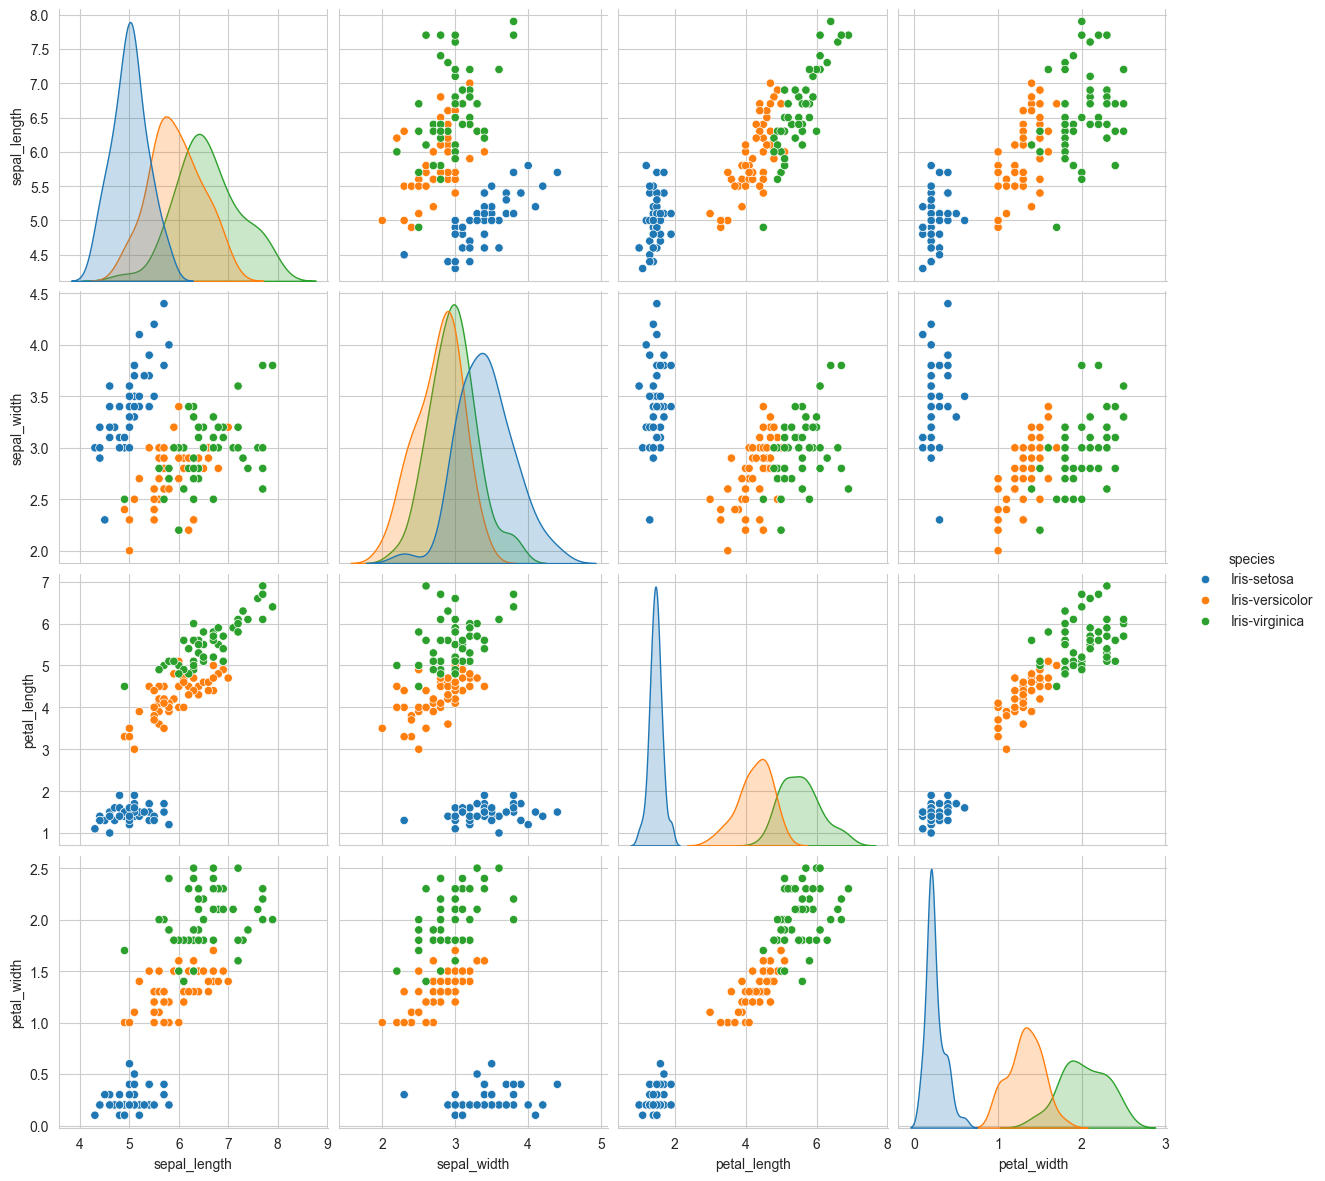

In [31]:
sns.pairplot(iris,hue="species",height=3)

# after observing the dataset we can conform selecting the petal_length and the petal width can give us the better classification

#### MODEL TRAINING

In [34]:
X=iris.drop("species",axis=1)
Y=iris["species"]

In [35]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [ ]:
# Now we have to plot 

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
model=KNeighborsClassifier(n_neighbors=5,metric="euclidean")

In [43]:
model.fit(X,Y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


#Model Prediction

In [46]:
sample=np.array([4.5,3.1,1.6,0.5])
model.predict([sample])

/opt/anaconda3/envs/ai-venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [47]:
model.score(X,Y)

0.9666666666666667

# How to Choose Optimal K 
### we have to manually calculate the k value by selecting some k , then for the one which we might have got the most accurate will be our k value

In [51]:
scores=[]
for k_val in range(1,41):
    knn=KNeighborsClassifier(n_neighbors=k_val,metric="euclidean")
    knn.fit(X,Y)
    scores.append(knn.score(X,Y))
print("scores ",scores)
    

scores  [1.0, 0.98, 0.96, 0.96, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.98, 0.9733333333333334, 0.98, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667, 0.98, 0.9733333333333334, 0.98, 0.98, 0.98, 0.98, 0.98, 0.9733333333333334, 0.98, 0.9733333333333334, 0.9733333333333334, 0.9666666666666667, 0.9733333333333334, 0.9533333333333334, 0.96, 0.9533333333333334, 0.96, 0.96, 0.96, 0.9533333333333334, 0.96, 0.9466666666666667, 0.9533333333333334, 0.9533333333333334]


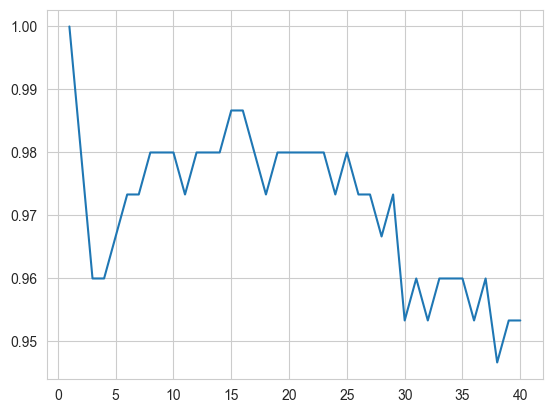

In [53]:
plt.plot(range(1,41),scores)

In [ ]:
# After conforming with the graph the optimal value of k is15 
